# Using twitter API

Golas:
For a selected Twitter account, the following points are analyzed:
* Frequency of tweets
* Hashtag usage

Methods: Get access to Twitter data using their API. This requires that one registers for a developer account on twitter. Make sure to do this early enough as there have been quite some rejections lately.

## Get all the necessary libraries

In [0]:
#!pip install twython # install if it's not yet present

In [0]:
from twython import Twython # this is the library used here for the scraping of Titter data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import seaborn as sns
from matplotlib import cm
import re

## Declare your Twitter developer codes

In [0]:
# this information can be found in the Twitter developer section after applying successfully for an account
# it was redacted here for data privacy reasons

OAUTH_TOKEN = 'insert own'
OAUTH_TOKEN_SECRET = 'insert own'
APP_KEY = 'insert own'
APP_SECRET = 'insert own'

In [0]:
twitter = Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

## Get data from Twitter

In [0]:
# search a keyword on Twitter and return the 200 most recent tweets
twitter.search(q='python', result_type="recent")

{'search_metadata': {'completed_in': 0.095,
  'count': 15,
  'max_id': 1147473314064949248,
  'max_id_str': '1147473314064949248',
  'next_results': '?max_id=1147472870206926848&q=python&include_entities=1&result_type=recent',
  'query': 'python',
  'refresh_url': '?since_id=1147473314064949248&q=python&result_type=recent&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Sat Jul 06 11:52:11 +0000 2019',
   'entities': {'hashtags': [],
    'symbols': [],
    'urls': [],
    'user_mentions': [{'id': 981843355775582211,
      'id_str': '981843355775582211',
      'indices': [3, 15],
      'name': 'いわし',
      'screen_name': 'tty_tkhs_ml'}]},
   'favorite_count': 0,
   'favorited': False,
   'geo': None,
   'id': 1147473314064949248,
   'id_str': '1147473314064949248',
   'in_reply_to_screen_name': None,
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id':

In [0]:
# choose any user you would like to look into
screen_name = 'tensorflow'
result = twitter.get_user_timeline(screen_name=screen_name, count=200)
result

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Fri Jul 05 16:28:31 +0000 2019',
  'entities': {'hashtags': [{'indices': [69, 83], 'text': 'AskTensorFlow'}],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/1…',
     'expanded_url': 'https://twitter.com/i/web/status/1147180466635718656',
     'indices': [107, 130],
     'url': 'https://t.co/czGewYQSnz'}],
   'user_mentions': []},
  'favorite_count': 70,
  'favorited': False,
  'geo': None,
  'id': 1147180466635718656,
  'id_str': '1147180466635718656',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'place': None,
  'possibly_sensitive': False,
  'retweet_count': 29,
  'retweeted': False,
  'source': '<a href="https://www.sprinklr.com" rel="nofollow">Sprinklr</a>',
  'text': 'Dive into the nuances of TensorFlow 2.0 and Keras on thi

In [0]:
type(result) # show of what type the variable "result" is

list

In [0]:
len(result) # confirm that there are indeed 200 teets

200

## Get tweets as dataframe, format as needed



In [0]:
# all the tweets from results list to table --> ony with relevant headings, whatever is not specifically listed will be omitted

alltweets = pd.DataFrame.from_records(result, columns=[
                                      "created_at", "text", "entities", "source",
                                      "retweet_count", "favorite_count"])
alltweets.head()

# alltweets.info()

,created_at,text,entities,source,retweet_count,favorite_count
0,Fri Jul 05 16:28:31 +0000 2019,Dive into the nuances of TensorFlow 2.0 and Ke...,"{'hashtags': [{'text': 'AskTensorFlow', 'indic...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",29,70
1,Tue Jul 02 16:47:31 +0000 2019,Amazing Apache Beam Summit in Berlin! Great wo...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",11,55
2,Sat Jun 29 15:00:07 +0000 2019,"On this episode of TensorFlow Meets, @lmoroney...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",27,62
3,Fri Jun 28 20:09:09 +0000 2019,Swift for TensorFlow is delighted to announce ...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",143,418
4,Fri Jun 28 16:14:08 +0000 2019,Learn why tf.function is replacing tf.session ...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",54,184


In [0]:
# get the timestamp into a datetime format and separate date and time into separate columns

alltweets["created_at"]=pd.to_datetime(alltweets["created_at"]) # convert the date column to datetime format
date=alltweets["created_at"]
alltweets['date'] = [d.date() for d in alltweets['created_at']] # get the date column
alltweets['time'] = [d.time() for d in alltweets['created_at']] # get the time column
alltweets=alltweets[["date", "time", "text", "entities", "source", 
                     "retweet_count", "favorite_count"]] # rearrange

In [0]:
date.head() # this is a pandas series preserving the datetime format for further down in the analysis

0   2019-07-05 16:28:31+00:00
1   2019-07-02 16:47:31+00:00
2   2019-06-29 15:00:07+00:00
3   2019-06-28 20:09:09+00:00
4   2019-06-28 16:14:08+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [0]:
alltweets.head(10)

,date,time,text,entities,source,retweet_count,favorite_count
0,2019-07-05,16:28:31,Dive into the nuances of TensorFlow 2.0 and Ke...,"{'hashtags': [{'text': 'AskTensorFlow', 'indic...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",29,70
1,2019-07-02,16:47:31,Amazing Apache Beam Summit in Berlin! Great wo...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",11,55
2,2019-06-29,15:00:07,"On this episode of TensorFlow Meets, @lmoroney...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",27,62
3,2019-06-28,20:09:09,Swift for TensorFlow is delighted to announce ...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",143,418
4,2019-06-28,16:14:08,Learn why tf.function is replacing tf.session ...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",54,184
5,2019-06-27,22:00:01,RT @martin_wicke: @DeepMindAI's model distribu...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",42,0
6,2019-06-27,19:00:00,RT @deeplearningai_: Want more SensorFlow fun ...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",30,0
7,2019-06-27,16:00:01,RT @random_forests: Trick a neural network int...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",44,0
8,2019-06-26,22:19:07,RT @edd: Totally psyched to read this story of...,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",24,0
9,2019-06-26,18:15:52,"You’ve got an amazing ML application, but how ...","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://www.sprinklr.com"" rel=""nofoll...",67,187


In [0]:
print("This account published " + str(len(result)) +
      " tweets over the course of " + str(alltweets["date"].nunique()) + " days.")

This account published 200 tweets over the course of 87 days.


## Analyze tweet frequency

In [0]:
day = []
month = []
for i in range(len(date)):
    day.append(date[i].day)
    month.append(date[i].month)

In [0]:
dday = pd.DataFrame({'day': day, 'month': month})
# a dataframe with only month and day as separate columns for easier plotting
dday.head(10)

,day,month
0,5,7
1,2,7
2,29,6
3,28,6
4,28,6
5,27,6
6,27,6
7,27,6
8,26,6
9,26,6


In [0]:
dday_month = dday[dday['month'] == 5]

dday_month_c = pd.DataFrame()

dday_month_c = dday_month.day.value_counts().reset_index().rename(
    columns={'index': 'day', "day": 'count'}).sort_values(['day'], ascending=[1])

dday_month_c = dday_month_c.reset_index().drop(columns="index")

dday_month_c

,day,count
0,1,1
1,2,2
2,3,2
3,5,1
4,6,1
5,8,6
6,9,9
7,13,2
8,14,2
9,15,2


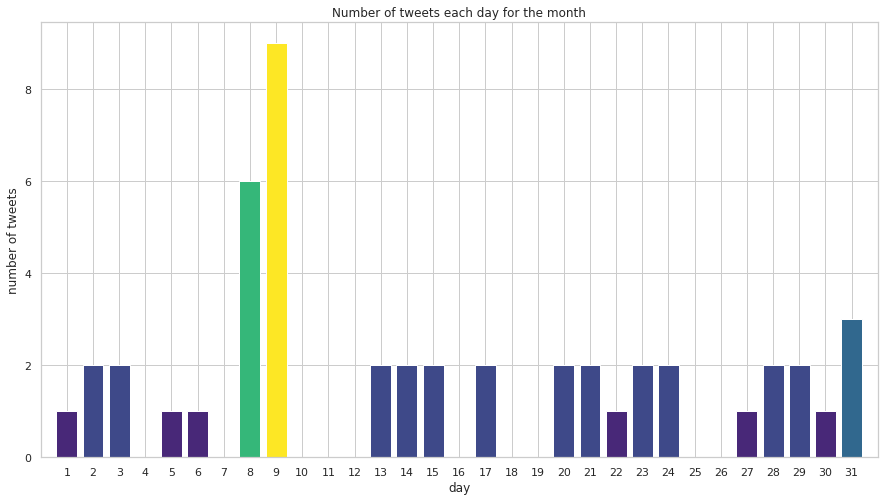

In [0]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")


y = dday_month_c["count"]
x = dday_month_c["day"]

colors = cm.viridis(y / float(max(y)))
plt.bar(x, y, color=colors)

plt.xlim(0, 32)
plt.xlabel('day')
plt.ylabel('number of tweets')
plt.title('Number of tweets each day for the month')

plt.xticks(range(1, 32))

plt.show()

In [0]:
# find the number of tweets this account has posted over the past months
# the process is similar to the one above, with the added step of renaming the months
# as the number of tweets is limited to 200, the number of the first displayed month is likely inaccurate
# some frequent posters may only have tweets showing from the current month

tweets_months = dday['month'].value_counts().sort_index()

tweets_months_c = pd.DataFrame()

tweets_months_c = tweets_months.reset_index().rename(
    columns={'index': 'month', "month": 'count'}).sort_values(['month'], ascending=[1])

tweets_months_c = tweets_months_c.reset_index().drop(columns="index")
tweets_months_c.month = tweets_months_c.month.astype(str)

tweets_months_c["month"] = tweets_months_c.month.replace({"1": "Jan",
                                                          "2": "Feb",
                                                          "3": "Mar",
                                                          "4": "Apr",
                                                          "5": "May",
                                                          "6": "Jun",
                                                          "7": "Jul",
                                                          "8": "Aug",
                                                          "9": "Sep",
                                                          "10": "Oct",
                                                          "11": "Nov",
                                                          "12": "Dev"})

tweets_months_c

,month,count
0,Feb,14
1,Mar,71
2,Apr,24
3,May,48
4,Jun,41
5,Jul,2


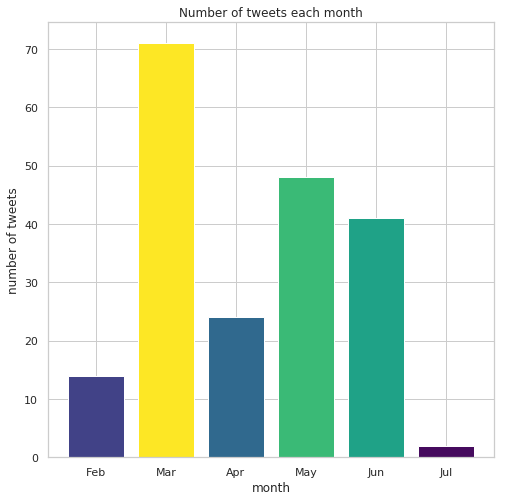

In [0]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")

y = tweets_months_c["count"]
x = tweets_months_c["month"]

# the following code is used to color the bars depending on their height
colors = cm.viridis(y / float(max(y)))
plt.bar(x, y, color=colors)

plt.xlabel('month')
plt.ylabel('number of tweets')
plt.title('Number of tweets each month')

plt.show()

## Hashtag usage

In [0]:
# now we can extract all the tags by first converting all tweets into a text corpus in simple string format
tweet_text = alltweets["text"].to_string()

# with regular expressions, the # are found
ht_list = re.findall(r"\#([A-Za-z]{1,})+", tweet_text)

# this list contains all the current hashtags (nonunique)
ht_list

['PoweredBy',
 'TFWorld',
 'TensorFlow',
 'io',
 'io',
 'IJCAI',
 'AskTensorFlow',
 'io',
 'TFX',
 'TensorFlowJS',
 'AskTensorFlow',
 'T',
 'AskTensorFlow',
 'TFDevSummit',
 'TensorFlow',
 'TensorFlow',
 'TFWorld',
 'Powe',
 'CleverHans',
 'TFDevSummit',
 'TFDevSummit',
 'PoweredByTF',
 'TFDevSummit',
 'TFDevSummit',
 'TFDevSummit',
 'TensorFlowJS',
 'TensorFlowJS',
 'TFDevSummit',
 'TFDevSummit',
 'TFDevSummit',
 'TFDevSummit',
 'TensorFl',
 'QuantumCasts',
 'CodingTensorFlow',
 'TFDevSummit',
 'TFDevSummit',
 'CodingTensorFlow',
 'QuantumCasts']

In [0]:
# to better plot and find the unique values, the list can be converted to a series and then to a dataframe

ht_counts = pd.Series(ht_list).value_counts().to_frame(
).reset_index().rename(columns={'index': 'tag', 0: 'count'})
ht_counts

,tag,count
0,TFDevSummit,12
1,TensorFlow,3
2,io,3
3,AskTensorFlow,3
4,TensorFlowJS,3
5,TFWorld,2
6,CodingTensorFlow,2
7,QuantumCasts,2
8,T,1
9,TensorFl,1


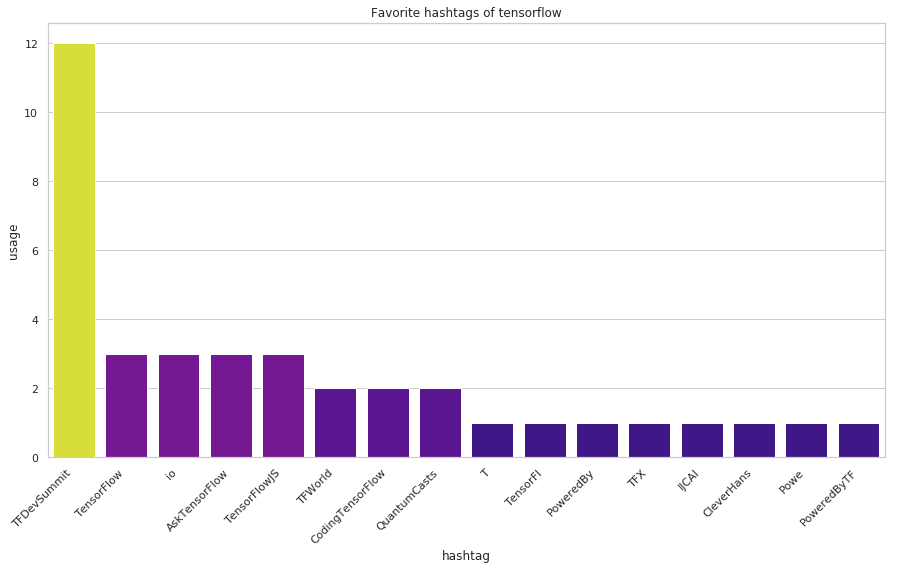

In [0]:
plt.figure(figsize=(15, 8))

sns.set(style="whitegrid")

y = ht_counts["count"]
colors = cm.plasma(y / float(max(y)))

chart = sns.barplot(
    data=ht_counts,
    x='tag',
    y="count",
    palette=colors
)

plt.xticks(
    rotation=45,  # the tags are quit long, therefore rotation is used to make them visible
    horizontalalignment='right'
)

plt.xlabel('hashtag')
plt.ylabel('usage')
plt.title('Favorite hashtags of ' + screen_name)
None

## Conclusions and further possibilities

In this notebook, I analyzed the Twitter account of Tensorflow as an example.
According to their tweet frequency, March was a busy month. This was most likely related to the TensorFlow Dev Summit in early March.
This hypothesis is supported by the hashtags, where TFDevSummit is the most popular one (by far).

The Twitter API offers many more possibilities for analysis.
For example, the following could be investigated for a single account:


*   Most popular tweet by retweets or likes
*   Mentioned accounts
*   Embedded links
*   Post frequency in a defined timeframe
*   Typical time of the day for tweets

Similarly, hashtags can be observed globally, which could enable timeseries analysis or correlation analysis between two or more topics (tags).

Users could be compared in their tweeting habits, such as tweets per day, or followers relative to amount of tweets.